In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Position:
    def __init__(self,x,y,f):
        # x y为自变量 可以多个
        self.x=x
        self.y=y
        # 该点的适应度 即要求的函数值
        self.f=f

    def __str__(self):
        return "x:"+str(self.x)+" y:"+str(self.y)+" f:"+str(self.f)

# 粒子数
n=100
# 粒子集合
p=[]
v=[]
pBest=[]
gBest=Position(0,0,0)
# 学习因子
c1=2.0
c2=2.0
# 惯性权重
w=0.2
# 更新边界
vmax=0.05
# 迭代次数
_max=10000

# 适应函数（主要修改的地方）
def fitnessFunction(x,y):
    return x**2+y**3-2*x*y + x**y

def pso():
    # 创建点集
    p = [Position(xi*10, yi*10, fitnessFunction(xi, yi)) for xi, yi in zip(np.random.rand(n), np.random.rand(n))]
    v = [Position(xi * vmax, yi * vmax, fitnessFunction(xi, yi)) for xi, yi in zip(np.random.rand(n), np.random.rand(n))]
    pBest = p.copy()
    # 当前个体极值
    gBest = max(p, key=lambda pi: pi.f)
    for i in range(_max):
        for j in range(n):
            # 更新速度和位置
            vx=w*v[j].x+c1*np.random.random()*(pBest[j].x-p[j].x)+c2*np.random.random()*(gBest.x-p[j].x)
            vy=w*v[j].y+c1*np.random.random()*(pBest[j].y-p[j].y)+c2*np.random.random()*(gBest.y-p[j].y)
            if vx>vmax:
                vx=vmax
            if vy>vmax:
                vy=vmax
            v[j]=Position(vx,vy,fitnessFunction(vx,vy))
            p[j].x+=v[j].x
            p[j].y+=v[j].y
            p[j].f=fitnessFunction(p[j].x,p[j].y)

            # 越界判断
            if p[j].x>=10:
                p[j].x=9.9
            if p[j].x<=0:
                p[j].x=0.1
            if p[j].y>=10:
                p[j].y=9.9
            if p[j].y<=0:
                p[j].y=0.1

        # 更新个体极值和群体极值
        for j in range(n):
            if pBest[j].f<p[j].f:
                pBest[j]=p[j]
            if p[j].f>gBest.f:
                gBest=p[j]

        print("====="+str(i+1)+"=====gBest:"+gBest.__str__())

if __name__=='__main__':
    pso()

<ipython-input-3-be0a734e829a>:35: RuntimeWarning: invalid value encountered in double_scalars
  return x**2+y**3-2*x*y + x**y


=====1=====gBest:x:7.559490319423271 y:7.622080120814773 f:4965625.76290928
=====2=====gBest:x:7.569490319423271 y:7.338189720132561 f:2823646.1526872762
=====3=====gBest:x:7.571490319423271 y:7.2814116399961195 f:2521963.7498737467
=====4=====gBest:x:7.571890319423271 y:7.270056023968831 f:2465602.236195072
=====5=====gBest:x:7.57197031942327 y:7.267784900763373 f:2454481.6460064314
=====6=====gBest:x:7.57198631942327 y:7.267330676122281 f:2452263.540204175
=====7=====gBest:x:7.57198951942327 y:7.267239831194063 f:2451820.159086159
=====8=====gBest:x:7.57199015942327 y:7.267221662208419 f:2451731.4924606797
=====9=====gBest:x:7.570008947041367 y:7.285842822843617 f:2541061.581569222
=====10=====gBest:x:7.57193713756463 y:7.300243991043788 f:2621085.9724703697
=====11=====gBest:x:7.571926507592902 y:7.3068491835702885 f:2656339.379719411
=====12=====gBest:x:7.571924381598556 y:7.308170222075589 f:2663446.755462449
=====13=====gBest:x:7.571923956399687 y:7.308434429776649 f:2664870.5109

=====133=====gBest:x:7.863502852298656 y:8.829227813920793 f:80835366.44835465
=====134=====gBest:x:7.864619606610636 y:8.857983741097843 f:85881934.53123297
=====135=====gBest:x:7.865254180149358 y:8.890676977823375 f:91938155.17477864
=====136=====gBest:x:7.8654155704483575 y:8.919285595334724 f:97543925.82465558
=====137=====gBest:x:7.865889340108408 y:8.952893024630962 f:104601321.52062331
=====138=====gBest:x:7.865861314597818 y:8.97892615162562 f:110367772.9892242
=====139=====gBest:x:7.866009326442661 y:9.01136789508813 f:118025365.59865923
=====140=====gBest:x:7.865903962196376 y:9.046084120480312 f:126770967.67191708
=====141=====gBest:x:7.865938162185868 y:9.067094243476824 f:132390443.00927782
=====142=====gBest:x:7.8659105987664235 y:9.102302470128125 f:142357529.6658305
=====143=====gBest:x:7.865865814917647 y:9.13124706850159 f:151107096.4967114
=====144=====gBest:x:7.865855188864233 y:9.161802196032163 f:160934455.6147434
=====145=====gBest:x:7.865838545007219 y:9.185739

=====296=====gBest:x:7.865815877380024 y:9.995433770694632 f:898148249.4815881
=====297=====gBest:x:7.865815877380024 y:9.9 f:936709098.0180925
=====298=====gBest:x:7.865815877380024 y:9.99498553578688 f:897318299.1841815
=====299=====gBest:x:7.865815877380024 y:9.9 f:931345537.6387618
=====300=====gBest:x:7.865815877380024 y:9.998191008290384 f:903270452.779928
=====301=====gBest:x:7.865815877380024 y:9.9 f:910844254.5490097
=====302=====gBest:x:7.865815877380024 y:9.992672961324528 f:893048513.8398964
=====303=====gBest:x:7.865815877380024 y:9.9 f:929315359.9360327
=====304=====gBest:x:7.865815877380024 y:9.975272381568695 f:861566104.268152
=====305=====gBest:x:7.865815877380024 y:9.994579474253756 f:896567099.0770208
=====306=====gBest:x:7.865815877380024 y:9.9 f:925540923.2088463
=====307=====gBest:x:7.865815877380024 y:9.961738593905132 f:837849103.6351421
=====308=====gBest:x:7.865815877380024 y:9.972677467221438 f:856967256.1593763
=====309=====gBest:x:7.865815877380024 y:9.9 f

=====416=====gBest:x:7.865815877380024 y:9.97529233287803 f:861601558.4972885
=====417=====gBest:x:7.865815877380024 y:9.995053199093798 f:897443535.1779083
=====418=====gBest:x:7.865815877380024 y:9.9 f:937956116.4324843
=====419=====gBest:x:7.865815877380024 y:9.991041544081027 f:890048600.1799972
=====420=====gBest:x:7.865815877380024 y:9.99914170492391 f:905043354.8191326
=====421=====gBest:x:7.865815877380024 y:9.9 f:947387188.8525256
=====422=====gBest:x:7.865815877380024 y:9.962936072716657 f:839921005.446245
=====423=====gBest:x:7.865815877380024 y:9.980383171128748 f:870696018.4983227
=====424=====gBest:x:7.865815877380024 y:9.9 f:940819150.0685816
=====425=====gBest:x:7.865815877380024 y:9.99289262280627 f:893453207.5559593
=====426=====gBest:x:7.865815877380024 y:9.9 f:929345527.0930718
=====427=====gBest:x:7.865815877380024 y:9.987802882975297 f:884123050.4869764
=====428=====gBest:x:7.865815877380024 y:9.9 f:921624449.8092655
=====429=====gBest:x:7.865815877380024 y:9.9852

=====535=====gBest:x:7.865815877380024 y:9.992531576670714 f:892788130.5438092
=====536=====gBest:x:7.865815877380024 y:9.9 f:942754534.4515435
=====537=====gBest:x:7.865815877380024 y:9.9 f:907251487.0094016
=====538=====gBest:x:7.865815877380024 y:9.963361425990678 f:840658192.7325907
=====539=====gBest:x:7.865815877380024 y:9.977182002126666 f:864966193.671219
=====540=====gBest:x:7.865815877380024 y:9.9 f:926267509.2425452
=====541=====gBest:x:7.865815877380024 y:9.996938755378938 f:900940493.9579817
=====542=====gBest:x:7.865815877380024 y:9.9 f:944718071.1378901
=====543=====gBest:x:7.865815877380024 y:9.987750620909983 f:884027754.4175289
=====544=====gBest:x:7.865815877380024 y:9.995616669781493 f:898487125.3166294
=====545=====gBest:x:7.865815877380024 y:9.9 f:917211071.8550072
=====546=====gBest:x:7.865815877380024 y:9.974298331290235 f:859836953.3185725
=====547=====gBest:x:7.865815877380024 y:9.98695590197731 f:882579907.3570116
=====548=====gBest:x:7.865815877380024 y:9.9 

<ipython-input-3-be0a734e829a>:35: RuntimeWarning: divide by zero encountered in double_scalars
  return x**2+y**3-2*x*y + x**y



=====744=====gBest:x:7.865815877380024 y:9.9 f:948142799.5997044
=====745=====gBest:x:7.865815877380024 y:9.988637639817858 f:885646561.9693893
=====746=====gBest:x:7.865815877380024 y:9.9 f:907817735.4848005
=====747=====gBest:x:7.865815877380024 y:9.973250239630534 f:857980238.7339141
=====748=====gBest:x:7.865815877380024 y:9.990617816969454 f:889271084.1932014
=====749=====gBest:x:7.865815877380024 y:9.9 f:932877308.627677
=====750=====gBest:x:7.865815877380024 y:9.993678471808716 f:894902520.0692255
=====751=====gBest:x:7.865815877380024 y:9.9 f:914609656.2901857
=====752=====gBest:x:7.865815877380024 y:9.992018009940335 f:891842950.7825586
=====753=====gBest:x:7.865815877380024 y:9.9 f:916194248.6950717
=====754=====gBest:x:7.865815877380024 y:9.978769973936837 f:867803801.8698366
=====755=====gBest:x:7.865815877380024 y:9.99597779606106 f:899156596.3925066
=====756=====gBest:x:7.865815877380024 y:9.9 f:914224065.0957338
=====757=====gBest:x:7.865815877380024 y:9.965396081573063

=====959=====gBest:x:7.865815877380024 y:9.9 f:917068907.0071025
=====960=====gBest:x:7.865815877380024 y:9.963845397846145 f:841497759.865543
=====961=====gBest:x:7.865815877380024 y:9.980156028681428 f:870288204.395182
=====962=====gBest:x:7.865815877380024 y:9.9 f:920106406.1459522
=====963=====gBest:x:7.865815877380024 y:9.981081224771762 f:871950508.3159341
=====964=====gBest:x:7.865815877380024 y:9.998739820465177 f:904293478.3327618
=====965=====gBest:x:7.865815877380024 y:9.9 f:943875051.9102311
=====966=====gBest:x:7.865815877380024 y:9.965457699565599 f:844300744.2803227
=====967=====gBest:x:7.865815877380024 y:9.983388655669302 f:876110126.7154915
=====968=====gBest:x:7.865815877380024 y:9.9 f:938618008.3744946
=====969=====gBest:x:7.865815877380024 y:9.9 f:910287227.7237431
=====970=====gBest:x:7.865815877380024 y:9.970076375832306 f:852382096.0238031
=====971=====gBest:x:7.865815877380024 y:9.969304483258687 f:851026143.0755811
=====972=====gBest:x:7.865815877380024 y:9.9 

=====1079=====gBest:x:7.865815877380024 y:9.991408478634499 f:890722454.158465
=====1080=====gBest:x:7.865815877380024 y:9.9 f:920169313.1203814
=====1081=====gBest:x:7.865815877380024 y:9.96834718387985 f:849347489.4123038
=====1082=====gBest:x:7.865815877380024 y:9.988437921875661 f:885281818.7793026
=====1083=====gBest:x:7.865815877380024 y:9.9 f:954661492.6299782
=====1084=====gBest:x:7.865815877380024 y:9.995781658299837 f:898792926.1006556
=====1085=====gBest:x:7.865815877380024 y:9.9 f:914762540.0858155
=====1086=====gBest:x:7.865815877380024 y:9.984899002086683 f:878843575.8532851
=====1087=====gBest:x:7.865815877380024 y:9.994792109644782 f:896960388.8941681
=====1088=====gBest:x:7.865815877380024 y:9.9 f:919472479.1776221
=====1089=====gBest:x:7.865815877380024 y:9.983264683033282 f:875886136.9767035
=====1090=====gBest:x:7.865815877380024 y:9.997487081857516 f:901959977.0972605
=====1091=====gBest:x:7.865815877380024 y:9.9 f:939250422.8406571
=====1092=====gBest:x:7.86581587

=====1191=====gBest:x:7.865815877380024 y:9.965081684200358 f:843646208.3882717
=====1192=====gBest:x:7.865815877380024 y:9.997992569346737 f:902900833.2094785
=====1193=====gBest:x:7.865815877380024 y:9.9 f:952514748.537282
=====1194=====gBest:x:7.865815877380024 y:9.9 f:921839005.6460103
=====1195=====gBest:x:7.865815877380024 y:9.967116817287478 f:847194865.7598783
=====1196=====gBest:x:7.865815877380024 y:9.977479378477526 f:865496879.9526107
=====1197=====gBest:x:7.865815877380024 y:9.9 f:926077438.3481073
=====1198=====gBest:x:7.865815877380024 y:9.994268684650821 f:895992573.7083135
=====1199=====gBest:x:7.865815877380024 y:9.9 f:916020606.4724861
=====1200=====gBest:x:7.865815877380024 y:9.9 f:910325898.1780385
=====1201=====gBest:x:7.865815877380024 y:9.939544411724548 f:800360279.3368577
=====1202=====gBest:x:7.865815877380024 y:9.960694864943608 f:836047392.0688846
=====1203=====gBest:x:7.865815877380024 y:9.99292350119765 f:893510111.1144016
=====1204=====gBest:x:7.86581587

=====1306=====gBest:x:7.865815877380024 y:9.971991924881515 f:855756405.4101125
=====1307=====gBest:x:7.865815877380024 y:9.991284965356027 f:890495572.2595452
=====1308=====gBest:x:7.865815877380024 y:9.9 f:928857527.8769855
=====1309=====gBest:x:7.865815877380024 y:9.949233116391685 f:816514903.1468383
=====1310=====gBest:x:7.865815877380024 y:9.967781078699359 f:848356365.1245645
=====1311=====gBest:x:7.865815877380024 y:9.9 f:912452509.8179722
=====1312=====gBest:x:7.865815877380024 y:9.9 f:910649308.1998912
=====1313=====gBest:x:7.865815877380024 y:9.972196439935242 f:856117454.4059234
=====1314=====gBest:x:7.865815877380024 y:9.984236106894585 f:877642808.9626081
=====1315=====gBest:x:7.865815877380024 y:9.9 f:923438929.6029333
=====1316=====gBest:x:7.865815877380024 y:9.99289210914589 f:893452260.9989688
=====1317=====gBest:x:7.865815877380024 y:9.9 f:922758780.665866
=====1318=====gBest:x:7.865815877380024 y:9.9 f:915715727.5186349
=====1319=====gBest:x:7.865815877380024 y:9.94

=====1418=====gBest:x:7.865815877380024 y:9.975094844644104 f:861250678.702591
=====1419=====gBest:x:7.865815877380024 y:9.9 f:914028352.2529035
=====1420=====gBest:x:7.865815877380024 y:9.996002731731371 f:899202841.5931602
=====1421=====gBest:x:7.865815877380024 y:9.9 f:937809487.8783802
=====1422=====gBest:x:7.865815877380024 y:9.988390103566212 f:885194510.8957965
=====1423=====gBest:x:7.865815877380024 y:9.997572549090119 f:902118987.0494028
=====1424=====gBest:x:7.865815877380024 y:9.9 f:947652945.5703044
=====1425=====gBest:x:7.865815877380024 y:9.99952176931464 f:905753089.3191438
=====1426=====gBest:x:7.865815877380024 y:9.9 f:908283501.5427188
=====1427=====gBest:x:7.865815877380024 y:9.962685512785384 f:839487058.1903834
=====1428=====gBest:x:7.865815877380024 y:9.973285482044556 f:858042606.1600826
=====1429=====gBest:x:7.865815877380024 y:9.9 f:918698767.2191963
=====1430=====gBest:x:7.865815877380024 y:9.998058100289919 f:903022876.7903674
=====1431=====gBest:x:7.86581587

=====1551=====gBest:x:7.865815877380024 y:9.978161860800459 f:866716042.8022542
=====1552=====gBest:x:7.865815877380024 y:9.991100744550891 f:890157283.9024311
=====1553=====gBest:x:7.865815877380024 y:9.9 f:941486921.4341487
=====1554=====gBest:x:7.865815877380024 y:9.9 f:914188196.8118328
=====1555=====gBest:x:7.865815877380024 y:9.948600484979899 f:815450194.8264085
=====1556=====gBest:x:7.865815877380024 y:9.961006056796379 f:836584173.6327133
=====1557=====gBest:x:7.865815877380024 y:9.998932814696957 f:904653508.8274868
=====1558=====gBest:x:7.865815877380024 y:9.9 f:953335775.2227353
=====1559=====gBest:x:7.865815877380024 y:9.979676969163656 f:869428721.6969267
=====1560=====gBest:x:7.865815877380024 y:9.998632818646099 f:904093928.321132
=====1561=====gBest:x:7.865815877380024 y:9.9 f:944372108.7297953
=====1562=====gBest:x:7.865815877380024 y:9.981329967750998 f:872397967.251405
=====1563=====gBest:x:7.865815877380024 y:9.998639048345892 f:904105545.0159788
=====1564=====gBes

=====1666=====gBest:x:7.865815877380024 y:9.9 f:940427492.6696383
=====1667=====gBest:x:7.865815877380024 y:9.999878914432765 f:906420531.4660503
=====1668=====gBest:x:7.865815877380024 y:9.9 f:922738561.6805657
=====1669=====gBest:x:7.865815877380024 y:9.954358627738262 f:825192470.5685173
=====1670=====gBest:x:7.865815877380024 y:9.97138679843014 f:854689012.2697794
=====1671=====gBest:x:7.865815877380024 y:9.9 f:919433313.1799344
=====1672=====gBest:x:7.865815877380024 y:9.990961313735953 f:889901329.7468345
=====1673=====gBest:x:7.865815877380024 y:9.9 f:921576143.5643308
=====1674=====gBest:x:7.865815877380024 y:9.990047059799942 f:888224849.6372383
=====1675=====gBest:x:7.865815877380024 y:9.9 f:921404591.8532641
=====1676=====gBest:x:7.865815877380024 y:9.993719619756762 f:894978472.4619068
=====1677=====gBest:x:7.865815877380024 y:9.9 f:932624833.5452338
=====1678=====gBest:x:7.865815877380024 y:9.998016488258246 f:902945377.4232689
=====1679=====gBest:x:7.865815877380024 y:9.9

=====1784=====gBest:x:7.865815877380024 y:9.976948366921755 f:864549485.6218268
=====1785=====gBest:x:7.865815877380024 y:9.999797178723869 f:906267738.2465785
=====1786=====gBest:x:7.865815877380024 y:9.9 f:953189366.8003291
=====1787=====gBest:x:7.865815877380024 y:9.998736402749469 f:904287103.8797734
=====1788=====gBest:x:7.865815877380024 y:9.9 f:929395044.4511399
=====1789=====gBest:x:7.865815877380024 y:9.99004114445442 f:888214012.876083
=====1790=====gBest:x:7.865815877380024 y:9.998701549212216 f:904222100.3846838
=====1791=====gBest:x:7.865815877380024 y:9.9 f:950027107.4070524
=====1792=====gBest:x:7.865815877380024 y:9.993069888644769 f:893779927.2943096
=====1793=====gBest:x:7.865815877380024 y:9.9 f:909489455.293574
=====1794=====gBest:x:7.865815877380024 y:9.988705595453043 f:885770703.0342823
=====1795=====gBest:x:7.865815877380024 y:9.9 f:910860166.3775079
=====1796=====gBest:x:7.865815877380024 y:9.980763860205208 f:871379940.528037
=====1797=====gBest:x:7.8658158773

=====1915=====gBest:x:7.865815877380024 y:9.9 f:931634778.3486872
=====1916=====gBest:x:7.865815877380024 y:9.97153773413246 f:854955125.7069306
=====1917=====gBest:x:7.865815877380024 y:9.968601583331266 f:849793263.2961471
=====1918=====gBest:x:7.865815877380024 y:9.99207940255951 f:891955886.4591025
=====1919=====gBest:x:7.865815877380024 y:9.9 f:934813883.5641245
=====1920=====gBest:x:7.865815877380024 y:9.995275199325564 f:897854551.5393504
=====1921=====gBest:x:7.865815877380024 y:9.9 f:934887323.1797228
=====1922=====gBest:x:7.865815877380024 y:9.984837362805889 f:878731853.3520647
=====1923=====gBest:x:7.865815877380024 y:9.9 f:915341252.8292559
=====1924=====gBest:x:7.865815877380024 y:9.990659080784503 f:889346771.1676526
=====1925=====gBest:x:7.865815877380024 y:9.9 f:922275368.0599865
=====1926=====gBest:x:7.865815877380024 y:9.96540289501205 f:844205313.523225
=====1927=====gBest:x:7.865815877380024 y:9.985859272303932 f:880585921.4490409
=====1928=====gBest:x:7.8658158773

=====2147=====gBest:x:7.865815877380024 y:9.981770938211325 f:873191784.9268595
=====2148=====gBest:x:7.865815877380024 y:9.9 f:912331193.8822871
=====2149=====gBest:x:7.865815877380024 y:9.975319664598352 f:861650130.3634635
=====2150=====gBest:x:7.865815877380024 y:9.989680381693164 f:887553354.6122096
=====2151=====gBest:x:7.865815877380024 y:9.9 f:947736922.9461296
=====2152=====gBest:x:7.865815877380024 y:9.9 f:912808989.9255513
=====2153=====gBest:x:7.865815877380024 y:9.956880305088651 f:829495494.3130378
=====2154=====gBest:x:7.865815877380024 y:9.966182223558974 f:845563366.9329464
=====2155=====gBest:x:7.865815877380024 y:9.9 f:911534419.1608299
=====2156=====gBest:x:7.865815877380024 y:9.980223279009929 f:870408926.4822942
=====2157=====gBest:x:7.865815877380024 y:9.997812357957885 f:902565295.9926721
=====2158=====gBest:x:7.865815877380024 y:9.9 f:942588462.9994078
=====2159=====gBest:x:7.865815877380024 y:9.980718705319843 f:871298790.0304633
=====2160=====gBest:x:7.865815

=====2274=====gBest:x:7.865815877380024 y:9.996794433772676 f:900672353.7487572
=====2275=====gBest:x:7.865815877380024 y:9.9 f:920585734.6041564
=====2276=====gBest:x:7.865815877380024 y:9.964943350948133 f:843405537.206696
=====2277=====gBest:x:7.865815877380024 y:9.970214397399094 f:852624780.6084179
=====2278=====gBest:x:7.865815877380024 y:9.9 f:916629553.9401678
=====2279=====gBest:x:7.865815877380024 y:9.9 f:920335894.3563622
=====2280=====gBest:x:7.865815877380024 y:9.955379627613086 f:826932022.4797058
=====2281=====gBest:x:7.865815877380024 y:9.962727187284354 f:839559219.1257126
=====2282=====gBest:x:7.865815877380024 y:9.989103674227962 f:886498261.247891
=====2283=====gBest:x:7.865815877380024 y:9.9 f:951616336.797018
=====2284=====gBest:x:7.865815877380024 y:9.9 f:909805216.5612273
=====2285=====gBest:x:7.865815877380024 y:9.967869548877957 f:848511180.450078
=====2286=====gBest:x:7.865815877380024 y:9.976351402889058 f:863485661.6015286
=====2287=====gBest:x:7.8658158773

=====2404=====gBest:x:7.865815877380024 y:9.9 f:912928890.1092811
=====2405=====gBest:x:7.865815877380024 y:9.967497821784006 f:847860879.4677768
=====2406=====gBest:x:7.865815877380024 y:9.975905888390619 f:862692582.4019631
=====2407=====gBest:x:7.865815877380024 y:9.9 f:930169914.3025222
=====2408=====gBest:x:7.865815877380024 y:9.99156125078702 f:891003161.7368964
=====2409=====gBest:x:7.865815877380024 y:9.9 f:921074164.2558833
=====2410=====gBest:x:7.865815877380024 y:9.980414597628227 f:870752457.0357103
=====2411=====gBest:x:7.865815877380024 y:9.99589186478459 f:898997248.167447
=====2412=====gBest:x:7.865815877380024 y:9.9 f:934449218.2347022
=====2413=====gBest:x:7.865815877380024 y:9.952836342847386 f:822605635.8922906
=====2414=====gBest:x:7.865815877380024 y:9.972553274213189 f:856747771.1535002
=====2415=====gBest:x:7.865815877380024 y:9.9 f:923641577.9019572
=====2416=====gBest:x:7.865815877380024 y:9.985807168290668 f:880491293.6607722
=====2417=====gBest:x:7.865815877

=====2515=====gBest:x:7.865815877380024 y:9.99834208475987 f:903551954.7350771
=====2516=====gBest:x:7.865815877380024 y:9.9 f:957466047.9040241
=====2517=====gBest:x:7.865815877380024 y:9.989971343887975 f:888086150.0142614
=====2518=====gBest:x:7.865815877380024 y:9.99513811239784 f:897600723.40723
=====2519=====gBest:x:7.865815877380024 y:9.9 f:950666118.3376278
=====2520=====gBest:x:7.865815877380024 y:9.96844231893896 f:849514163.354998
=====2521=====gBest:x:7.865815877380024 y:9.985575311870772 f:880070334.9841763
=====2522=====gBest:x:7.865815877380024 y:9.9 f:934725659.4522896
=====2523=====gBest:x:7.865815877380024 y:9.997211428727434 f:901447321.3117096
=====2524=====gBest:x:7.865815877380024 y:9.9 f:937198354.2825261
=====2525=====gBest:x:7.865815877380024 y:9.978144051567627 f:866684207.1921268
=====2526=====gBest:x:7.865815877380024 y:9.997129656491666 f:901295298.5140038
=====2527=====gBest:x:7.865815877380024 y:9.9 f:943141884.8050536
=====2528=====gBest:x:7.865815877380

=====2633=====gBest:x:7.865815877380024 y:9.9 f:927892370.687789
=====2634=====gBest:x:7.865815877380024 y:9.981255040623042 f:872263158.1287647
=====2635=====gBest:x:7.865815877380024 y:9.9 f:908590397.5546843
=====2636=====gBest:x:7.865815877380024 y:9.987190977193558 f:883007928.5573728
=====2637=====gBest:x:7.865815877380024 y:9.9 f:918226100.0324908
=====2638=====gBest:x:7.865815877380024 y:9.9778890025761 f:866228412.3819356
=====2639=====gBest:x:7.865815877380024 y:9.997356430711148 f:901716957.6117561
=====2640=====gBest:x:7.865815877380024 y:9.9 f:950216990.2906728
=====2641=====gBest:x:7.865815877380024 y:9.9 f:907506960.1154189
=====2642=====gBest:x:7.865815877380024 y:9.944754647132108 f:809007520.290186
=====2643=====gBest:x:7.865815877380024 y:9.960241629185397 f:835266211.9497255
=====2644=====gBest:x:7.865815877380024 y:9.988374484824533 f:885165995.6662216
=====2645=====gBest:x:7.865815877380024 y:9.9 f:944755271.5270543
=====2646=====gBest:x:7.865815877380024 y:9.9962

=====2753=====gBest:x:7.865815877380024 y:9.944042929992397 f:807820821.9134727
=====2754=====gBest:x:7.865815877380024 y:9.958131836081858 f:831639447.8969412
=====2755=====gBest:x:7.865815877380024 y:9.992625731635904 f:892961524.0868713
=====2756=====gBest:x:7.865815877380024 y:9.9 f:937452041.913877
=====2757=====gBest:x:7.865815877380024 y:9.968425259839522 f:849484273.8870388
=====2758=====gBest:x:7.865815877380024 y:9.982936648743058 f:875293731.4554765
=====2759=====gBest:x:7.865815877380024 y:9.9 f:943499856.2804047
=====2760=====gBest:x:7.865815877380024 y:9.9 f:910779774.4278297
=====2761=====gBest:x:7.865815877380024 y:9.97711804850714 f:864852107.0479829
=====2762=====gBest:x:7.865815877380024 y:9.980763587481285 f:871379450.3771642
=====2763=====gBest:x:7.865815877380024 y:9.9 f:927134437.6408161
=====2764=====gBest:x:7.865815877380024 y:9.993508268800223 f:894588421.5758559
=====2765=====gBest:x:7.865815877380024 y:9.9 f:917182081.7934958
=====2766=====gBest:x:7.86581587

=====2870=====gBest:x:7.865815877380024 y:9.993582605072705 f:894725590.7307996
=====2871=====gBest:x:7.865815877380024 y:9.9 f:918951383.9960713
=====2872=====gBest:x:7.865815877380024 y:9.994913478801896 f:897184950.2783556
=====2873=====gBest:x:7.865815877380024 y:9.9 f:926638279.6844932
=====2874=====gBest:x:7.865815877380024 y:9.994693614617752 f:896778191.3272338
=====2875=====gBest:x:7.865815877380024 y:9.9 f:926068739.9419707
=====2876=====gBest:x:7.865815877380024 y:9.971434399686139 f:854772928.6910329
=====2877=====gBest:x:7.865815877380024 y:9.991899050052682 f:891624157.1054314
=====2878=====gBest:x:7.865815877380024 y:9.9 f:932315641.079228
=====2879=====gBest:x:7.865815877380024 y:9.99213177840006 f:892052246.4954818
=====2880=====gBest:x:7.865815877380024 y:9.9 f:932950938.51613
=====2881=====gBest:x:7.865815877380024 y:9.978544378508758 f:867400110.0813298
=====2882=====gBest:x:7.865815877380024 y:9.996864617743961 f:900802741.0581057
=====2883=====gBest:x:7.8658158773

=====2992=====gBest:x:7.865815877380024 y:9.941743389375961 f:803998513.5649205
=====2993=====gBest:x:7.865815877380024 y:9.957986695569735 f:831390529.0256643
=====2994=====gBest:x:7.865815877380024 y:9.994932569591558 f:897220277.8300371
=====2995=====gBest:x:7.865815877380024 y:9.9 f:941706910.8638257
=====2996=====gBest:x:7.865815877380024 y:9.986540179356481 f:881823474.0768096
=====2997=====gBest:x:7.865815877380024 y:9.9 f:918528559.7866356
=====2998=====gBest:x:7.865815877380024 y:9.974670897906533 f:860497929.8203055
=====2999=====gBest:x:7.865815877380024 y:9.995303359508474 f:897906701.4045179
=====3000=====gBest:x:7.865815877380024 y:9.9 f:938778240.7692971
=====3001=====gBest:x:7.865815877380024 y:9.978655153632472 f:867598313.1789179
=====3002=====gBest:x:7.865815877380024 y:9.980353657811735 f:870643019.157117
=====3003=====gBest:x:7.865815877380024 y:9.9 f:925145154.5205162
=====3004=====gBest:x:7.865815877380024 y:9.995558809110124 f:898379907.1119363
=====3005=====gBe

=====3120=====gBest:x:7.865815877380024 y:9.991351578944267 f:890617927.7726073
=====3121=====gBest:x:7.865815877380024 y:9.9 f:937021170.0530269
=====3122=====gBest:x:7.865815877380024 y:9.991579014786486 f:891035807.5182763
=====3123=====gBest:x:7.865815877380024 y:9.9 f:916053540.0392536
=====3124=====gBest:x:7.865815877380024 y:9.981103160939474 f:871989959.634786
=====3125=====gBest:x:7.865815877380024 y:9.994936965474805 f:897228412.6194712
=====3126=====gBest:x:7.865815877380024 y:9.9 f:930230642.6661513
=====3127=====gBest:x:7.865815877380024 y:9.991356982832203 f:890627854.3447385
=====3128=====gBest:x:7.865815877380024 y:9.9 f:910183131.397427
=====3129=====gBest:x:7.865815877380024 y:9.99508144054334 f:897495811.6033217
=====3130=====gBest:x:7.865815877380024 y:9.9 f:929332371.7532854
=====3131=====gBest:x:7.865815877380024 y:9.98762387603409 f:883796687.027331
=====3132=====gBest:x:7.865815877380024 y:9.9 f:918801487.8442807
=====3133=====gBest:x:7.865815877380024 y:9.99057

=====3238=====gBest:x:7.865815877380024 y:9.9 f:918134391.60429
=====3239=====gBest:x:7.865815877380024 y:9.9 f:910144749.8312802
=====3240=====gBest:x:7.865815877380024 y:9.986134419216922 f:881085793.3566422
=====3241=====gBest:x:7.865815877380024 y:9.9 f:907427993.4138917
=====3242=====gBest:x:7.865815877380024 y:9.98858022446743 f:885541689.4117151
=====3243=====gBest:x:7.865815877380024 y:9.9 f:923054133.9958011
=====3244=====gBest:x:7.865815877380024 y:9.981424311873646 f:872567741.1253182
=====3245=====gBest:x:7.865815877380024 y:9.997819137193762 f:902577916.055915
=====3246=====gBest:x:7.865815877380024 y:9.9 f:947550045.5287749
=====3247=====gBest:x:7.865815877380024 y:9.989983698088846 f:888108779.4853256
=====3248=====gBest:x:7.865815877380024 y:9.995282079064612 f:897867291.8539753
=====3249=====gBest:x:7.865815877380024 y:9.9 f:949674847.3445427
=====3250=====gBest:x:7.865815877380024 y:9.982064451374127 f:873720556.1298206
=====3251=====gBest:x:7.865815877380024 y:9.9952

=====3350=====gBest:x:7.865815877380024 y:9.968446718897864 f:849521872.7503002
=====3351=====gBest:x:7.865815877380024 y:9.998570435466897 f:903977608.8987654
=====3352=====gBest:x:7.865815877380024 y:9.9 f:954046268.4535655
=====3353=====gBest:x:7.865815877380024 y:9.990245708077035 f:888588844.9642757
=====3354=====gBest:x:7.865815877380024 y:9.9 f:926079641.2628347
=====3355=====gBest:x:7.865815877380024 y:9.997215322819773 f:901454561.4599962
=====3356=====gBest:x:7.865815877380024 y:9.9 f:932836887.2099699
=====3357=====gBest:x:7.865815877380024 y:9.985152876580981 f:879303878.5010085
=====3358=====gBest:x:7.865815877380024 y:9.9 f:921300848.7569062
=====3359=====gBest:x:7.865815877380024 y:9.9 f:908529611.3209755
=====3360=====gBest:x:7.865815877380024 y:9.972423089337534 f:856517757.1305082
=====3361=====gBest:x:7.865815877380024 y:9.983179967128233 f:875733107.9640487
=====3362=====gBest:x:7.865815877380024 y:9.9 f:923191036.8281691
=====3363=====gBest:x:7.865815877380024 y:9.

=====3574=====gBest:x:7.865815877380024 y:9.996838124217563 f:900753519.3454638
=====3575=====gBest:x:7.865815877380024 y:9.9 f:941465500.5631902
=====3576=====gBest:x:7.865815877380024 y:9.996207295537229 f:899582311.3818537
=====3577=====gBest:x:7.865815877380024 y:9.9 f:927001788.3901014
=====3578=====gBest:x:7.865815877380024 y:9.982969156482655 f:875352420.1243758
=====3579=====gBest:x:7.865815877380024 y:9.9 f:912771394.3710858
=====3580=====gBest:x:7.865815877380024 y:9.999091345931166 f:904949355.8729128
=====3581=====gBest:x:7.865815877380024 y:9.9 f:933467313.2907093
=====3582=====gBest:x:7.865815877380024 y:9.993389441601844 f:894369199.1248721
=====3583=====gBest:x:7.865815877380024 y:9.9 f:935464566.1438352
=====3584=====gBest:x:7.865815877380024 y:9.988922238996876 f:886166582.7126054
=====3585=====gBest:x:7.865815877380024 y:9.999700152167181 f:906086394.4076661
=====3586=====gBest:x:7.865815877380024 y:9.9 f:941606360.2148293
=====3587=====gBest:x:7.865815877380024 y:9.

=====3698=====gBest:x:7.865815877380024 y:9.9 f:934011540.4689115
=====3699=====gBest:x:7.865815877380024 y:9.996745197354462 f:900580893.9268397
=====3700=====gBest:x:7.865815877380024 y:9.9 f:919509699.2138797
=====3701=====gBest:x:7.865815877380024 y:9.979653382401116 f:869386426.5184762
=====3702=====gBest:x:7.865815877380024 y:9.995976792841885 f:899154735.8918478
=====3703=====gBest:x:7.865815877380024 y:9.9 f:946300520.090259
=====3704=====gBest:x:7.865815877380024 y:9.981058593083505 f:871909808.0019238
=====3705=====gBest:x:7.865815877380024 y:9.991920839682662 f:891664229.0627736
=====3706=====gBest:x:7.865815877380024 y:9.9 f:946273079.0696379
=====3707=====gBest:x:7.865815877380024 y:9.98627051185137 f:881333143.90936
=====3708=====gBest:x:7.865815877380024 y:9.9 f:917819353.2565297
=====3709=====gBest:x:7.865815877380024 y:9.980134962138662 f:870250390.9681356
=====3710=====gBest:x:7.865815877380024 y:9.994256183674002 f:895969472.1179761
=====3711=====gBest:x:7.8658158773

=====3815=====gBest:x:7.865815877380024 y:9.9 f:908076477.9553493
=====3816=====gBest:x:7.865815877380024 y:9.974895540757995 f:860896717.8854462
=====3817=====gBest:x:7.865815877380024 y:9.993020841089374 f:893689515.4949077
=====3818=====gBest:x:7.865815877380024 y:9.9 f:944342551.4748954
=====3819=====gBest:x:7.865815877380024 y:9.993259399621342 f:894129348.262102
=====3820=====gBest:x:7.865815877380024 y:9.9 f:922450726.9817415
=====3821=====gBest:x:7.865815877380024 y:9.97712584281244 f:864866010.4748716
=====3822=====gBest:x:7.865815877380024 y:9.992850244808272 f:893375118.1022118
=====3823=====gBest:x:7.865815877380024 y:9.9 f:926149589.7037512
=====3824=====gBest:x:7.865815877380024 y:9.990144866328526 f:888404047.8541447
=====3825=====gBest:x:7.865815877380024 y:9.9 f:919778857.9780889
=====3826=====gBest:x:7.865815877380024 y:9.983003402250663 f:875414250.843081
=====3827=====gBest:x:7.865815877380024 y:9.999803811200211 f:906280135.7523947
=====3828=====gBest:x:7.865815877

=====3931=====gBest:x:7.865815877380024 y:9.970906699965763 f:853843105.4332118
=====3932=====gBest:x:7.865815877380024 y:9.9 f:922572923.3167306
=====3933=====gBest:x:7.865815877380024 y:9.987262854209227 f:883138842.5127552
=====3934=====gBest:x:7.865815877380024 y:9.9 f:910478828.8660496
=====3935=====gBest:x:7.865815877380024 y:9.978247319280799 f:866868823.8143647
=====3936=====gBest:x:7.865815877380024 y:9.999776649844026 f:906229366.4883752
=====3937=====gBest:x:7.865815877380024 y:9.9 f:932235405.9445739
=====3938=====gBest:x:7.865815877380024 y:9.979068571581209 f:868338416.4183273
=====3939=====gBest:x:7.865815877380024 y:9.994001649275397 f:895499226.4338626
=====3940=====gBest:x:7.865815877380024 y:9.9 f:912229360.7003341
=====3941=====gBest:x:7.865815877380024 y:9.962290146256551 f:838802774.8924001
=====3942=====gBest:x:7.865815877380024 y:9.968687891345544 f:849944550.4889396
=====3943=====gBest:x:7.865815877380024 y:9.9 f:908828856.9232104
=====3944=====gBest:x:7.865815

=====4056=====gBest:x:7.865815877380024 y:9.984085907799315 f:877370966.7115521
=====4057=====gBest:x:7.865815877380024 y:9.9 f:911092157.1019516
=====4058=====gBest:x:7.865815877380024 y:9.991422139555146 f:890747551.4931817
=====4059=====gBest:x:7.865815877380024 y:9.9 f:928836402.9200265
=====4060=====gBest:x:7.865815877380024 y:9.9 f:910234994.4745337
=====4061=====gBest:x:7.865815877380024 y:9.982763549763229 f:874981289.093391
=====4062=====gBest:x:7.865815877380024 y:9.989526541759501 f:887271779.8220475
=====4063=====gBest:x:7.865815877380024 y:9.9 f:931276635.9043425
=====4064=====gBest:x:7.865815877380024 y:9.994367564930366 f:896175323.7560873
=====4065=====gBest:x:7.865815877380024 y:9.9 f:937196211.0031986
=====4066=====gBest:x:7.865815877380024 y:9.989392119255053 f:887025818.0786633
=====4067=====gBest:x:7.865815877380024 y:9.9 f:915355058.0479269
=====4068=====gBest:x:7.865815877380024 y:9.986804287761075 f:882303960.6779982
=====4069=====gBest:x:7.865815877380024 y:9.9

=====4189=====gBest:x:7.865815877380024 y:9.9 f:914172582.248328
=====4190=====gBest:x:7.865815877380024 y:9.97198709973544 f:855747888.9804176
=====4191=====gBest:x:7.865815877380024 y:9.988882166277111 f:886093343.2153593
=====4192=====gBest:x:7.865815877380024 y:9.9 f:935344350.5683798
=====4193=====gBest:x:7.865815877380024 y:9.999519276593746 f:905748432.5845985
=====4194=====gBest:x:7.865815877380024 y:9.9 f:938676509.6296365
=====4195=====gBest:x:7.865815877380024 y:9.973501658813165 f:858425266.8062409
=====4196=====gBest:x:7.865815877380024 y:9.993427337874815 f:894439107.534704
=====4197=====gBest:x:7.865815877380024 y:9.9 f:933160636.7605283
=====4198=====gBest:x:7.865815877380024 y:9.995711660609825 f:898663174.9785908
=====4199=====gBest:x:7.865815877380024 y:9.9 f:939491692.2370187
=====4200=====gBest:x:7.865815877380024 y:9.987438683893167 f:883459173.56919
=====4201=====gBest:x:7.865815877380024 y:9.9 f:925113178.7318969
=====4202=====gBest:x:7.865815877380024 y:9.98380

=====4311=====gBest:x:7.865815877380024 y:9.989411967929518 f:887062132.2194852
=====4312=====gBest:x:7.865815877380024 y:9.9 f:941520506.1916425
=====4313=====gBest:x:7.865815877380024 y:9.9 f:918553102.5551926
=====4314=====gBest:x:7.865815877380024 y:9.93584368573535 f:794274514.8603607
=====4315=====gBest:x:7.865815877380024 y:9.952583235514428 f:822176314.8816082
=====4316=====gBest:x:7.865815877380024 y:9.988450737042726 f:885305218.4998158
=====4317=====gBest:x:7.865815877380024 y:9.9 f:929506622.0692319
=====4318=====gBest:x:7.865815877380024 y:9.988966535894022 f:886247549.6343468
=====4319=====gBest:x:7.865815877380024 y:9.9 f:915322472.8778417
=====4320=====gBest:x:7.865815877380024 y:9.987562501840339 f:883684818.0173763
=====4321=====gBest:x:7.865815877380024 y:9.9 f:908560681.0816017
=====4322=====gBest:x:7.865815877380024 y:9.9 f:911776122.0834973
=====4323=====gBest:x:7.865815877380024 y:9.98902274766803 f:886350305.5014907
=====4324=====gBest:x:7.865815877380024 y:9.99

=====4446=====gBest:x:7.865815877380024 y:9.9 f:950417523.6294439
=====4447=====gBest:x:7.865815877380024 y:9.995349822758413 f:897992753.35611
=====4448=====gBest:x:7.865815877380024 y:9.9 f:932673053.3581092
=====4449=====gBest:x:7.865815877380024 y:9.986052074368674 f:880936163.9806875
=====4450=====gBest:x:7.865815877380024 y:9.9 f:910801840.5196146
=====4451=====gBest:x:7.865815877380024 y:9.9 f:909009697.8863927
=====4452=====gBest:x:7.865815877380024 y:9.957493009095202 f:830544404.4574662
=====4453=====gBest:x:7.865815877380024 y:9.973468141526922 f:858365925.7280908
=====4454=====gBest:x:7.865815877380024 y:9.9 f:909975627.508703
=====4455=====gBest:x:7.865815877380024 y:9.98914630731575 f:886576216.0520113
=====4456=====gBest:x:7.865815877380024 y:9.9 f:919710456.6185879
=====4457=====gBest:x:7.865815877380024 y:9.983006110543448 f:875419140.8508337
=====4458=====gBest:x:7.865815877380024 y:9.9 f:912630362.8903263
=====4459=====gBest:x:7.865815877380024 y:9.9 f:922310370.9904

=====4572=====gBest:x:7.865815877380024 y:9.993338262428964 f:894274796.0169822
=====4573=====gBest:x:7.865815877380024 y:9.9 f:916289534.6870378
=====4574=====gBest:x:7.865815877380024 y:9.978287437130696 f:866940555.016262
=====4575=====gBest:x:7.865815877380024 y:9.995942198752712 f:899090582.4500225
=====4576=====gBest:x:7.865815877380024 y:9.9 f:942284430.5311031
=====4577=====gBest:x:7.865815877380024 y:9.984654091048354 f:878399753.2986158
=====4578=====gBest:x:7.865815877380024 y:9.998558494652482 f:903955345.8112351
=====4579=====gBest:x:7.865815877380024 y:9.9 f:944400235.6512086
=====4580=====gBest:x:7.865815877380024 y:9.984495246580325 f:878112018.578233
=====4581=====gBest:x:7.865815877380024 y:9.9 f:911297694.1140531
=====4582=====gBest:x:7.865815877380024 y:9.984936520344611 f:878911585.4440726
=====4583=====gBest:x:7.865815877380024 y:9.995191339548937 f:897699269.4915681
=====4584=====gBest:x:7.865815877380024 y:9.9 f:931528305.2678944
=====4585=====gBest:x:7.86581587

=====4689=====gBest:x:7.865815877380024 y:9.9 f:936898980.48203
=====4690=====gBest:x:7.865815877380024 y:9.995269427554966 f:897843863.1668065
=====4691=====gBest:x:7.865815877380024 y:9.9 f:936352115.4610782
=====4692=====gBest:x:7.865815877380024 y:9.978076405871331 f:866563295.064114
=====4693=====gBest:x:7.865815877380024 y:9.986880355642581 f:882442397.8539925
=====4694=====gBest:x:7.865815877380024 y:9.9 f:942600430.7260792
=====4695=====gBest:x:7.865815877380024 y:9.9 f:916473699.2108475
=====4696=====gBest:x:7.865815877380024 y:9.928602464957356 f:782500017.0780332
=====4697=====gBest:x:7.865815877380024 y:9.947964189027621 f:814380719.5724539
=====4698=====gBest:x:7.865815877380024 y:9.979933980573682 f:869889721.3602271
=====4699=====gBest:x:7.865815877380024 y:9.9 f:925709117.6037978
=====4700=====gBest:x:7.865815877380024 y:9.998893883385758 f:904580870.9765183
=====4701=====gBest:x:7.865815877380024 y:9.9 f:928719511.6509213
=====4702=====gBest:x:7.865815877380024 y:9.987

=====4809=====gBest:x:7.865815877380024 y:9.9 f:929139467.8557491
=====4810=====gBest:x:7.865815877380024 y:9.9955470999663 f:898358211.1433055
=====4811=====gBest:x:7.865815877380024 y:9.9 f:926500425.4481775
=====4812=====gBest:x:7.865815877380024 y:9.964816832741192 f:843185481.8669658
=====4813=====gBest:x:7.865815877380024 y:9.981242911110943 f:872241336.6319181
=====4814=====gBest:x:7.865815877380024 y:9.9 f:934144758.2653973
=====4815=====gBest:x:7.865815877380024 y:9.9 f:909024108.9009787
=====4816=====gBest:x:7.865815877380024 y:9.963189794692573 f:840360657.6595256
=====4817=====gBest:x:7.865815877380024 y:9.980294159631532 f:870536183.4901435
=====4818=====gBest:x:7.865815877380024 y:9.9 f:928680830.6242635
=====4819=====gBest:x:7.865815877380024 y:9.996070845742397 f:899329176.6124066
=====4820=====gBest:x:7.865815877380024 y:9.9 f:932115732.3756753
=====4821=====gBest:x:7.865815877380024 y:9.97463620741782 f:860436363.4123894
=====4822=====gBest:x:7.865815877380024 y:9.988

=====4932=====gBest:x:7.865815877380024 y:9.98232301282296 f:874186626.2303944
=====4933=====gBest:x:7.865815877380024 y:9.9 f:914876357.2312168
=====4934=====gBest:x:7.865815877380024 y:9.975043441714156 f:861159373.918393
=====4935=====gBest:x:7.865815877380024 y:9.99139131832895 f:890690928.8861556
=====4936=====gBest:x:7.865815877380024 y:9.9 f:907977153.9633843
=====4937=====gBest:x:7.865815877380024 y:9.976300077706188 f:863394258.3270673
=====4938=====gBest:x:7.865815877380024 y:9.992952728192806 f:893563974.7725593
=====4939=====gBest:x:7.865815877380024 y:9.9 f:911555712.5006016
=====4940=====gBest:x:7.865815877380024 y:9.952895756148116 f:822706445.2993834
=====4941=====gBest:x:7.865815877380024 y:9.96961995441968 f:851580057.8698521
=====4942=====gBest:x:7.865815877380024 y:9.9 f:912763345.0256543
=====4943=====gBest:x:7.865815877380024 y:9.992466865526259 f:892668979.562796
=====4944=====gBest:x:7.865815877380024 y:9.9 f:925813652.3713493
=====4945=====gBest:x:7.86581587738

=====5055=====gBest:x:7.865815877380024 y:9.997938486358528 f:902800122.5057662
=====5056=====gBest:x:7.865815877380024 y:9.9 f:932333822.9948851
=====5057=====gBest:x:7.865815877380024 y:9.98925765952901 f:886779856.440206
=====5058=====gBest:x:7.865815877380024 y:9.9 f:920401542.0569704
=====5059=====gBest:x:7.865815877380024 y:9.986022553463528 f:880882527.534055
=====5060=====gBest:x:7.865815877380024 y:9.99281460011908 f:893309441.3245313
=====5061=====gBest:x:7.865815877380024 y:9.9 f:935623603.7101948
=====5062=====gBest:x:7.865815877380024 y:9.973056354671666 f:857637207.4927889
=====5063=====gBest:x:7.865815877380024 y:9.986871988575524 f:882427169.4292779
=====5064=====gBest:x:7.865815877380024 y:9.9 f:950633276.4454498
=====5065=====gBest:x:7.865815877380024 y:9.996654836677461 f:900413067.3043735
=====5066=====gBest:x:7.865815877380024 y:9.9 f:936962071.6326704
=====5067=====gBest:x:7.865815877380024 y:9.989741026094901 f:887664377.2294582
=====5068=====gBest:x:7.8658158773

=====5280=====gBest:x:7.865815877380024 y:9.993275090579937 f:894158285.4264234
=====5281=====gBest:x:7.865815877380024 y:9.9 f:933624709.9426541
=====5282=====gBest:x:7.865815877380024 y:9.987264932077846 f:883142627.3491721
=====5283=====gBest:x:7.865815877380024 y:9.99811459394622 f:903128102.7409582
=====5284=====gBest:x:7.865815877380024 y:9.9 f:952530660.7417645
=====5285=====gBest:x:7.865815877380024 y:9.999540106522002 f:905787346.4000437
=====5286=====gBest:x:7.865815877380024 y:9.9 f:907162662.0135149
=====5287=====gBest:x:7.865815877380024 y:9.979459448614886 f:869038747.4184481
=====5288=====gBest:x:7.865815877380024 y:9.986856345117658 f:882398698.3628801
=====5289=====gBest:x:7.865815877380024 y:9.9 f:942430343.5859687
=====5290=====gBest:x:7.865815877380024 y:9.9 f:918588540.0176
=====5291=====gBest:x:7.865815877380024 y:9.960960575212049 f:836505699.9644046
=====5292=====gBest:x:7.865815877380024 y:9.976567538234848 f:863870675.8797317
=====5293=====gBest:x:7.8658158773

=====5394=====gBest:x:7.865815877380024 y:9.9 f:917000887.0596492
=====5395=====gBest:x:7.865815877380024 y:9.990095748187235 f:888314050.5358502
=====5396=====gBest:x:7.865815877380024 y:9.9 f:929729602.3417084
=====5397=====gBest:x:7.865815877380024 y:9.98092410645921 f:871667989.496427
=====5398=====gBest:x:7.865815877380024 y:9.999755223503112 f:906189318.9647261
=====5399=====gBest:x:7.865815877380024 y:9.9 f:952457095.2130495
=====5400=====gBest:x:7.865815877380024 y:9.982476070587829 f:874462637.7362442
=====5401=====gBest:x:7.865815877380024 y:9.987362970204988 f:883321222.1762968
=====5402=====gBest:x:7.865815877380024 y:9.9 f:947797098.9824733
=====5403=====gBest:x:7.865815877380024 y:9.9 f:906843123.5088106
=====5404=====gBest:x:7.865815877380024 y:9.965047879116767 f:843587388.2107635
=====5405=====gBest:x:7.865815877380024 y:9.977426578498292 f:865402631.3939929
=====5406=====gBest:x:7.865815877380024 y:9.9 f:911702320.4135249
=====5407=====gBest:x:7.865815877380024 y:9.98

=====5609=====gBest:x:7.865815877380024 y:9.9 f:932945639.3193395
=====5610=====gBest:x:7.865815877380024 y:9.990137118355726 f:888389850.9300472
=====5611=====gBest:x:7.865815877380024 y:9.9 f:920411182.0520703
=====5612=====gBest:x:7.865815877380024 y:9.993415639238753 f:894417526.1211408
=====5613=====gBest:x:7.865815877380024 y:9.9 f:922548081.6717373
=====5614=====gBest:x:7.865815877380024 y:9.979052680905378 f:868309957.1733819
=====5615=====gBest:x:7.865815877380024 y:9.996580671252378 f:900275343.4457811
=====5616=====gBest:x:7.865815877380024 y:9.9 f:935774464.0202725
=====5617=====gBest:x:7.865815877380024 y:9.999020774317756 f:904817644.937189
=====5618=====gBest:x:7.865815877380024 y:9.9 f:926716366.1459911
=====5619=====gBest:x:7.865815877380024 y:9.997756833707568 f:902461940.0181991
=====5620=====gBest:x:7.865815877380024 y:9.9 f:919244939.4548912
=====5621=====gBest:x:7.865815877380024 y:9.985916407945442 f:880689699.030944
=====5622=====gBest:x:7.865815877380024 y:9.9 

=====5728=====gBest:x:7.865815877380024 y:9.99127874602112 f:890484149.473614
=====5729=====gBest:x:7.865815877380024 y:9.9 f:915714898.9634763
=====5730=====gBest:x:7.865815877380024 y:9.967892725097451 f:848551741.5425951
=====5731=====gBest:x:7.865815877380024 y:9.983885976822217 f:877009246.3822434
=====5732=====gBest:x:7.865815877380024 y:9.9 f:942095698.4886521
=====5733=====gBest:x:7.865815877380024 y:9.996617659897225 f:900344028.0596609
=====5734=====gBest:x:7.865815877380024 y:9.9 f:917011727.9302135
=====5735=====gBest:x:7.865815877380024 y:9.99344333554687 f:894468620.5682017
=====5736=====gBest:x:7.865815877380024 y:9.9 f:920055046.5060825
=====5737=====gBest:x:7.865815877380024 y:9.9931583352639 f:893942988.4677361
=====5738=====gBest:x:7.865815877380024 y:9.9 f:925109896.5972123
=====5739=====gBest:x:7.865815877380024 y:9.98221754732342 f:873996489.3135532
=====5740=====gBest:x:7.865815877380024 y:9.998291545614839 f:903457774.9911422
=====5741=====gBest:x:7.865815877380

=====5946=====gBest:x:7.865815877380024 y:9.9 f:946278932.786865
=====5947=====gBest:x:7.865815877380024 y:9.971902624289584 f:855598802.7280122
=====5948=====gBest:x:7.865815877380024 y:9.98629081912967 f:881370058.6677583
=====5949=====gBest:x:7.865815877380024 y:9.9 f:943915730.2363396
=====5950=====gBest:x:7.865815877380024 y:9.9 f:909061658.2099606
=====5951=====gBest:x:7.865815877380024 y:9.96913501478315 f:850728733.4452889
=====5952=====gBest:x:7.865815877380024 y:9.97967612880805 f:869427214.7574307
=====5953=====gBest:x:7.865815877380024 y:9.9 f:917760419.6780474
=====5954=====gBest:x:7.865815877380024 y:9.9 f:913195952.7656436
=====5955=====gBest:x:7.865815877380024 y:9.969508724303498 f:851384715.182275
=====5956=====gBest:x:7.865815877380024 y:9.977158272533535 f:864923860.7826053
=====5957=====gBest:x:7.865815877380024 y:9.9 f:933895429.1818463
=====5958=====gBest:x:7.865815877380024 y:9.990967304978597 f:889912326.4008886
=====5959=====gBest:x:7.865815877380024 y:9.9 f:9

=====6062=====gBest:x:7.865815877380024 y:9.988477878624758 f:885354779.4303412
=====6063=====gBest:x:7.865815877380024 y:9.9 f:911523253.1503977
=====6064=====gBest:x:7.865815877380024 y:9.997748418163956 f:902446275.8830903
=====6065=====gBest:x:7.865815877380024 y:9.9 f:928468246.6399173
=====6066=====gBest:x:7.865815877380024 y:9.999052158781952 f:904876216.7891827
=====6067=====gBest:x:7.865815877380024 y:9.9 f:943281688.2768345
=====6068=====gBest:x:7.865815877380024 y:9.971625233690036 f:855109433.3610404
=====6069=====gBest:x:7.865815877380024 y:9.985327819357869 f:879621209.4789444
=====6070=====gBest:x:7.865815877380024 y:9.9 f:941091437.7253119
=====6071=====gBest:x:7.865815877380024 y:9.994127574815796 f:895731839.7405111
=====6072=====gBest:x:7.865815877380024 y:9.9 f:923799034.238077
=====6073=====gBest:x:7.865815877380024 y:9.986461393651426 f:881680191.6567885
=====6074=====gBest:x:7.865815877380024 y:9.9 f:913505655.6444257
=====6075=====gBest:x:7.865815877380024 y:9.9

=====6286=====gBest:x:7.865815877380024 y:9.99171828471744 f:891291792.2186679
=====6287=====gBest:x:7.865815877380024 y:9.9 f:947330083.9447451
=====6288=====gBest:x:7.865815877380024 y:9.997395926338854 f:901790415.0985444
=====6289=====gBest:x:7.865815877380024 y:9.9 f:928649327.3481139
=====6290=====gBest:x:7.865815877380024 y:9.984511743650199 f:878141897.383963
=====6291=====gBest:x:7.865815877380024 y:9.9 f:918984439.2459162
=====6292=====gBest:x:7.865815877380024 y:9.974480350850934 f:860159813.7299612
=====6293=====gBest:x:7.865815877380024 y:9.990921691989653 f:889828609.2498665
=====6294=====gBest:x:7.865815877380024 y:9.9 f:934085067.5221945
=====6295=====gBest:x:7.865815877380024 y:9.999976157269721 f:906602346.5992213
=====6296=====gBest:x:7.865815877380024 y:9.9 f:908001860.0618331
=====6297=====gBest:x:7.865815877380024 y:9.948565830028123 f:815391911.2349414
=====6298=====gBest:x:7.865815877380024 y:9.967351123097911 f:847604381.3276845
=====6299=====gBest:x:7.86581587

=====6506=====gBest:x:7.865815877380024 y:9.967142258081415 f:847239321.154424
=====6507=====gBest:x:7.865815877380024 y:9.988814074533513 f:885968908.216931
=====6508=====gBest:x:7.865815877380024 y:9.9 f:939012941.5026828
=====6509=====gBest:x:7.865815877380024 y:9.998036717148269 f:902983051.4213871
=====6510=====gBest:x:7.865815877380024 y:9.9 f:934282978.6803555
=====6511=====gBest:x:7.865815877380024 y:9.994873431634538 f:897110847.4193139
=====6512=====gBest:x:7.865815877380024 y:9.9 f:929176376.6955541
=====6513=====gBest:x:7.865815877380024 y:9.97468534278335 f:860523566.9408963
=====6514=====gBest:x:7.865815877380024 y:9.98693691234202 f:882545340.3906115
=====6515=====gBest:x:7.865815877380024 y:9.9 f:948698551.4617727
=====6516=====gBest:x:7.865815877380024 y:9.9 f:906998573.9076374
=====6517=====gBest:x:7.865815877380024 y:9.95223275452962 f:821582198.468649
=====6518=====gBest:x:7.865815877380024 y:9.964162880142723 f:842048965.6589928
=====6519=====gBest:x:7.865815877380

=====6621=====gBest:x:7.865815877380024 y:9.9 f:942156222.937544
=====6622=====gBest:x:7.865815877380024 y:9.984305157984622 f:877767811.3692521
=====6623=====gBest:x:7.865815877380024 y:9.993568166287977 f:894698945.8887274
=====6624=====gBest:x:7.865815877380024 y:9.9 f:944525190.3416674
=====6625=====gBest:x:7.865815877380024 y:9.956393454498544 f:828662981.7499244
=====6626=====gBest:x:7.865815877380024 y:9.973383322786777 f:858215775.7051948
=====6627=====gBest:x:7.865815877380024 y:9.9 f:919275965.5842294
=====6628=====gBest:x:7.865815877380024 y:9.995252579461628 f:897812663.9889163
=====6629=====gBest:x:7.865815877380024 y:9.9 f:929630777.5378869
=====6630=====gBest:x:7.865815877380024 y:9.999866798213205 f:906397880.3000388
=====6631=====gBest:x:7.865815877380024 y:9.9 f:930829589.2571503
=====6632=====gBest:x:7.865815877380024 y:9.968708857808226 f:849981306.1509924
=====6633=====gBest:x:7.865815877380024 y:9.987022435822993 f:882701030.0655856
=====6634=====gBest:x:7.8658158

=====6838=====gBest:x:7.865815877380024 y:9.98291062731473 f:875246755.8479737
=====6839=====gBest:x:7.865815877380024 y:9.9 f:945332741.657731
=====6840=====gBest:x:7.865815877380024 y:9.988736257805341 f:885826722.5857744
=====6841=====gBest:x:7.865815877380024 y:9.9 f:926904256.6902878
=====6842=====gBest:x:7.865815877380024 y:9.985279941309685 f:879534351.4842992
=====6843=====gBest:x:7.865815877380024 y:9.9 f:916491554.0035108
=====6844=====gBest:x:7.865815877380024 y:9.987803037247037 f:884123331.8054641
=====6845=====gBest:x:7.865815877380024 y:9.9 f:907149370.158635
=====6846=====gBest:x:7.865815877380024 y:9.988059861583096 f:884591781.7243344
=====6847=====gBest:x:7.865815877380024 y:9.9 f:915897686.6312505
=====6848=====gBest:x:7.865815877380024 y:9.9 f:915319237.8534281
=====6849=====gBest:x:7.865815877380024 y:9.973768108210008 f:858897151.2687151
=====6850=====gBest:x:7.865815877380024 y:9.979619006498458 f:869324788.2148293
=====6851=====gBest:x:7.865815877380024 y:9.9 f

=====7056=====gBest:x:7.865815877380024 y:9.9 f:916340873.2498976
=====7057=====gBest:x:7.865815877380024 y:9.986548455612269 f:881838526.9145035
=====7058=====gBest:x:7.865815877380024 y:9.9 f:908436227.9981407
=====7059=====gBest:x:7.865815877380024 y:9.97427263187337 f:859791378.287964
=====7060=====gBest:x:7.865815877380024 y:9.994477903338412 f:896379294.6647679
=====7061=====gBest:x:7.865815877380024 y:9.9 f:936583573.8277562
=====7062=====gBest:x:7.865815877380024 y:9.982813986824988 f:875072316.0963084
=====7063=====gBest:x:7.865815877380024 y:9.991091793811899 f:890140850.7550873
=====7064=====gBest:x:7.865815877380024 y:9.9 f:941203361.0582044
=====7065=====gBest:x:7.865815877380024 y:9.996278124864125 f:899713738.4630802
=====7066=====gBest:x:7.865815877380024 y:9.9 f:932581107.5407162
=====7067=====gBest:x:7.865815877380024 y:9.985892351950659 f:880646003.7460498
=====7068=====gBest:x:7.865815877380024 y:9.99698801961619 f:901032041.9985542
=====7069=====gBest:x:7.865815877

=====7175=====gBest:x:7.865815877380024 y:9.9 f:910255918.3199493
=====7176=====gBest:x:7.865815877380024 y:9.94405286087936 f:807837368.4313513
=====7177=====gBest:x:7.865815877380024 y:9.959740047524054 f:834402555.4754083
=====7178=====gBest:x:7.865815877380024 y:9.990670224167491 f:889367211.7043804
=====7179=====gBest:x:7.865815877380024 y:9.9 f:943941088.7323364
=====7180=====gBest:x:7.865815877380024 y:9.99751569774438 f:902013213.2193602
=====7181=====gBest:x:7.865815877380024 y:9.9 f:944342117.7738445
=====7182=====gBest:x:7.865815877380024 y:9.996424531081828 f:899985462.8167878
=====7183=====gBest:x:7.865815877380024 y:9.9 f:923626519.3141874
=====7184=====gBest:x:7.865815877380024 y:9.980149303485065 f:870276132.8139113
=====7185=====gBest:x:7.865815877380024 y:9.9 f:910767698.4800173
=====7186=====gBest:x:7.865815877380024 y:9.987363247678568 f:883321727.69769
=====7187=====gBest:x:7.865815877380024 y:9.9 f:910247996.5002116
=====7188=====gBest:x:7.865815877380024 y:9.9743

=====7405=====gBest:x:7.865815877380024 y:9.984694257504167 f:878472526.7241057
=====7406=====gBest:x:7.865815877380024 y:9.9 f:911150803.731389
=====7407=====gBest:x:7.865815877380024 y:9.985545541107538 f:880016297.7478902
=====7408=====gBest:x:7.865815877380024 y:9.995534560350023 f:898334976.9664749
=====7409=====gBest:x:7.865815877380024 y:9.9 f:943879984.0208089
=====7410=====gBest:x:7.865815877380024 y:9.954159990825813 f:824854463.8424956
=====7411=====gBest:x:7.865815877380024 y:9.9728764965667 f:857319115.9081514
=====7412=====gBest:x:7.865815877380024 y:9.9 f:917692425.4578348
=====7413=====gBest:x:7.865815877380024 y:9.9 f:906885563.0926082
=====7414=====gBest:x:7.865815877380024 y:9.960148754762814 f:835106227.217083
=====7415=====gBest:x:7.865815877380024 y:9.96881626047772 f:850169615.4011389
=====7416=====gBest:x:7.865815877380024 y:9.994464533921864 f:896354577.5712677
=====7417=====gBest:x:7.865815877380024 y:9.9 f:948482829.3915532
=====7418=====gBest:x:7.86581587738

=====7526=====gBest:x:7.865815877380024 y:9.973689597277124 f:858758080.6965578
=====7527=====gBest:x:7.865815877380024 y:9.990825782174115 f:889652604.0167084
=====7528=====gBest:x:7.865815877380024 y:9.9 f:943394593.6335543
=====7529=====gBest:x:7.865815877380024 y:9.992880523245633 f:893430911.137335
=====7530=====gBest:x:7.865815877380024 y:9.9 f:921958160.4054472
=====7531=====gBest:x:7.865815877380024 y:9.969192532091224 f:850829662.1069924
=====7532=====gBest:x:7.865815877380024 y:9.985858808986345 f:880585079.9581332
=====7533=====gBest:x:7.865815877380024 y:9.9 f:939002508.0893575
=====7534=====gBest:x:7.865815877380024 y:9.992787209336099 f:893258975.9826585
=====7535=====gBest:x:7.865815877380024 y:9.9 f:916400769.9352558
=====7536=====gBest:x:7.865815877380024 y:9.993343151074292 f:894283812.9911853
=====7537=====gBest:x:7.865815877380024 y:9.9 f:922639400.2170978
=====7538=====gBest:x:7.865815877380024 y:9.98617110397795 f:881152461.664937
=====7539=====gBest:x:7.865815877

=====7750=====gBest:x:7.865815877380024 y:9.96368534527622 f:841220016.9231616
=====7751=====gBest:x:7.865815877380024 y:9.9 f:910335345.3137537
=====7752=====gBest:x:7.865815877380024 y:9.987783628881397 f:884087940.8540821
=====7753=====gBest:x:7.865815877380024 y:9.9 f:908609897.1062032
=====7754=====gBest:x:7.865815877380024 y:9.997424084675306 f:901842790.1351225
=====7755=====gBest:x:7.865815877380024 y:9.9 f:922567930.0211732
=====7756=====gBest:x:7.865815877380024 y:9.983233482139783 f:875829773.2345163
=====7757=====gBest:x:7.865815877380024 y:9.9 f:909195075.7363485
=====7758=====gBest:x:7.865815877380024 y:9.990872371093397 f:889738095.5431551
=====7759=====gBest:x:7.865815877380024 y:9.9 f:912673335.3068893
=====7760=====gBest:x:7.865815877380024 y:9.982253752757329 f:874061757.0828284
=====7761=====gBest:x:7.865815877380024 y:9.996922410070741 f:900910121.4245149
=====7762=====gBest:x:7.865815877380024 y:9.9 f:925286469.9122479
=====7763=====gBest:x:7.865815877380024 y:9.9

=====7960=====gBest:x:7.865815877380024 y:9.9 f:938533241.620111
=====7961=====gBest:x:7.865815877380024 y:9.992078586541904 f:891954385.24839
=====7962=====gBest:x:7.865815877380024 y:9.9 f:929917489.6547291
=====7963=====gBest:x:7.865815877380024 y:9.98834847515639 f:885118511.6989214
=====7964=====gBest:x:7.865815877380024 y:9.9 f:914934278.0084239
=====7965=====gBest:x:7.865815877380024 y:9.978617371052916 f:867530706.0505208
=====7966=====gBest:x:7.865815877380024 y:9.998370133692779 f:903604228.1840458
=====7967=====gBest:x:7.865815877380024 y:9.9 f:950615108.072744
=====7968=====gBest:x:7.865815877380024 y:9.992790485139556 f:893265011.2402252
=====7969=====gBest:x:7.865815877380024 y:9.9 f:925814929.4758903
=====7970=====gBest:x:7.865815877380024 y:9.974333856561227 f:859899957.3762327
=====7971=====gBest:x:7.865815877380024 y:9.993875899035428 f:895266997.2287499
=====7972=====gBest:x:7.865815877380024 y:9.9 f:936215135.7338778
=====7973=====gBest:x:7.865815877380024 y:9.98892

=====8076=====gBest:x:7.865815877380024 y:9.982566125435715 f:874625075.7979536
=====8077=====gBest:x:7.865815877380024 y:9.994728914625227 f:896843485.5509373
=====8078=====gBest:x:7.865815877380024 y:9.9 f:942680627.9167864
=====8079=====gBest:x:7.865815877380024 y:9.987751401790955 f:884029178.2215109
=====8080=====gBest:x:7.865815877380024 y:9.999983919975762 f:906616862.1184962
=====8081=====gBest:x:7.865815877380024 y:9.9 f:935383494.5415158
=====8082=====gBest:x:7.865815877380024 y:9.995552981099815 f:898369108.278338
=====8083=====gBest:x:7.865815877380024 y:9.9 f:923161633.1152817
=====8084=====gBest:x:7.865815877380024 y:9.982598598639596 f:874683657.328903
=====8085=====gBest:x:7.865815877380024 y:9.9 f:912895670.8921953
=====8086=====gBest:x:7.865815877380024 y:9.979904745985472 f:869837271.1546676
=====8087=====gBest:x:7.865815877380024 y:9.997966133324356 f:902851603.9339938
=====8088=====gBest:x:7.865815877380024 y:9.9 f:947304201.1720357
=====8089=====gBest:x:7.86581587

=====8201=====gBest:x:7.865815877380024 y:9.9 f:949952319.184917
=====8202=====gBest:x:7.865815877380024 y:9.997589621860746 f:902150753.9317685
=====8203=====gBest:x:7.865815877380024 y:9.9 f:918346356.9375558
=====8204=====gBest:x:7.865815877380024 y:9.9961561816946 f:899487479.2170068
=====8205=====gBest:x:7.865815877380024 y:9.9 f:914434318.71251
=====8206=====gBest:x:7.865815877380024 y:9.98764511921037 f:883835411.0485355
=====8207=====gBest:x:7.865815877380024 y:9.9 f:921929307.8137066
=====8208=====gBest:x:7.865815877380024 y:9.994636193565492 f:896671990.0877895
=====8209=====gBest:x:7.865815877380024 y:9.9 f:934208364.2967737
=====8210=====gBest:x:7.865815877380024 y:9.98916574868607 f:886611766.9659716
=====8211=====gBest:x:7.865815877380024 y:9.9 f:913217743.6649344
=====8212=====gBest:x:7.865815877380024 y:9.988419238637736 f:885247705.4241877
=====8213=====gBest:x:7.865815877380024 y:9.9 f:929038288.7559686
=====8214=====gBest:x:7.865815877380024 y:9.9920051183161 f:89181

=====8429=====gBest:x:7.865815877380024 y:9.9 f:934044282.6230547
=====8430=====gBest:x:7.865815877380024 y:9.981883970688424 f:873395377.8230518
=====8431=====gBest:x:7.865815877380024 y:9.9 f:909801036.5252396
=====8432=====gBest:x:7.865815877380024 y:9.986844548155673 f:882377228.5199357
=====8433=====gBest:x:7.865815877380024 y:9.9 f:908268459.1525365
=====8434=====gBest:x:7.865815877380024 y:9.981883858511964 f:873395175.7484745
=====8435=====gBest:x:7.865815877380024 y:9.998594160266142 f:904021844.2994101
=====8436=====gBest:x:7.865815877380024 y:9.9 f:933947167.2158002
=====8437=====gBest:x:7.865815877380024 y:9.969645694757018 f:851625269.5187393
=====8438=====gBest:x:7.865815877380024 y:9.976342127192023 f:863469142.1114796
=====8439=====gBest:x:7.865815877380024 y:9.9 f:922564707.7014414
=====8440=====gBest:x:7.865815877380024 y:9.995920888871469 f:899051066.3521689
=====8441=====gBest:x:7.865815877380024 y:9.9 f:922498888.1102226
=====8442=====gBest:x:7.865815877380024 y:9.

=====8548=====gBest:x:7.865815877380024 y:9.9 f:918889999.7368106
=====8549=====gBest:x:7.865815877380024 y:9.955238267468546 f:826690958.3611182
=====8550=====gBest:x:7.865815877380024 y:9.969886018412875 f:852047502.1570345
=====8551=====gBest:x:7.865815877380024 y:9.9 f:910871478.7958955
=====8552=====gBest:x:7.865815877380024 y:9.9 f:909661934.9000134
=====8553=====gBest:x:7.865815877380024 y:9.944510020234526 f:808599439.3667604
=====8554=====gBest:x:7.865815877380024 y:9.952730273518515 f:822425693.667171
=====8555=====gBest:x:7.865815877380024 y:9.98538929386638 f:879732746.0790567
=====8556=====gBest:x:7.865815877380024 y:9.9 f:935090114.4187349
=====8557=====gBest:x:7.865815877380024 y:9.99363015629706 f:894813345.7522
=====8558=====gBest:x:7.865815877380024 y:9.9 f:916080738.6010747
=====8559=====gBest:x:7.865815877380024 y:9.99709487274362 f:901230639.8059678
=====8560=====gBest:x:7.865815877380024 y:9.9 f:935992820.680794
=====8561=====gBest:x:7.865815877380024 y:9.97513285

=====8760=====gBest:x:7.865815877380024 y:9.9 f:944298926.1804835
=====8761=====gBest:x:7.865815877380024 y:9.946688693143914 f:812241110.1718822
=====8762=====gBest:x:7.865815877380024 y:9.96503532292449 f:843565541.728816
=====8763=====gBest:x:7.865815877380024 y:9.9 f:909009842.9624039
=====8764=====gBest:x:7.865815877380024 y:9.989276722134738 f:886814722.7300655
=====8765=====gBest:x:7.865815877380024 y:9.9 f:910985644.1960695
=====8766=====gBest:x:7.865815877380024 y:9.99500346006481 f:897351472.9931324
=====8767=====gBest:x:7.865815877380024 y:9.9 f:933120159.1120344
=====8768=====gBest:x:7.865815877380024 y:9.985091333978122 f:879192272.7954829
=====8769=====gBest:x:7.865815877380024 y:9.9 f:912596390.6212978
=====8770=====gBest:x:7.865815877380024 y:9.984817168905105 f:878695254.5682079
=====8771=====gBest:x:7.865815877380024 y:9.9 f:913281878.9706846
=====8772=====gBest:x:7.865815877380024 y:9.989584544747581 f:887377932.7868191
=====8773=====gBest:x:7.865815877380024 y:9.9 f

=====8982=====gBest:x:7.865815877380024 y:9.982179306413911 f:873927557.471638
=====8983=====gBest:x:7.865815877380024 y:9.9 f:912970759.5949353
=====8984=====gBest:x:7.865815877380024 y:9.977259619373354 f:865104675.0043696
=====8985=====gBest:x:7.865815877380024 y:9.999175998957535 f:905107372.8678933
=====8986=====gBest:x:7.865815877380024 y:9.9 f:950956063.5866632
=====8987=====gBest:x:7.865815877380024 y:9.987464660951668 f:883506509.0948379
=====8988=====gBest:x:7.865815877380024 y:9.997314742579803 f:901639428.8025051
=====8989=====gBest:x:7.865815877380024 y:9.9 f:938809351.801683
=====8990=====gBest:x:7.865815877380024 y:9.9 f:911465009.5859736
=====8991=====gBest:x:7.865815877380024 y:9.968249205252569 f:849175867.8003078
=====8992=====gBest:x:7.865815877380024 y:9.981120325825069 f:872020831.2387141
=====8993=====gBest:x:7.865815877380024 y:9.9 f:939002130.675861
=====8994=====gBest:x:7.865815877380024 y:9.9 f:910255342.6547437
=====8995=====gBest:x:7.865815877380024 y:9.967

=====9206=====gBest:x:7.865815877380024 y:9.9 f:910787384.2063814
=====9207=====gBest:x:7.865815877380024 y:9.948038617237245 f:814505744.7489291
=====9208=====gBest:x:7.865815877380024 y:9.965934282276903 f:845131069.0990942
=====9209=====gBest:x:7.865815877380024 y:9.993140335277122 f:893909801.0804701
=====9210=====gBest:x:7.865815877380024 y:9.9 f:929052691.2033582
=====9211=====gBest:x:7.865815877380024 y:9.960041528815749 f:834921558.7752037
=====9212=====gBest:x:7.865815877380024 y:9.972653927241552 f:856925649.8804897
=====9213=====gBest:x:7.865815877380024 y:9.9 f:907896238.066296
=====9214=====gBest:x:7.865815877380024 y:9.989474617855015 f:887176763.1379915
=====9215=====gBest:x:7.865815877380024 y:9.9 f:915725421.4625956
=====9216=====gBest:x:7.865815877380024 y:9.99067399946956 f:889374136.9251999
=====9217=====gBest:x:7.865815877380024 y:9.9 f:908200346.8491006
=====9218=====gBest:x:7.865815877380024 y:9.98844496395832 f:885294677.1200626
=====9219=====gBest:x:7.865815877

=====9322=====gBest:x:7.865815877380024 y:9.983781822005422 f:876820865.8607925
=====9323=====gBest:x:7.865815877380024 y:9.9 f:938287295.7639635
=====9324=====gBest:x:7.865815877380024 y:9.99515946340339 f:897640251.8956891
=====9325=====gBest:x:7.865815877380024 y:9.9 f:925664762.6047841
=====9326=====gBest:x:7.865815877380024 y:9.997104271628936 f:901248110.7200179
=====9327=====gBest:x:7.865815877380024 y:9.9 f:906851790.0072439
=====9328=====gBest:x:7.865815877380024 y:9.983293528428339 f:875938248.7885275
=====9329=====gBest:x:7.865815877380024 y:9.999059092408341 f:904889157.3123807
=====9330=====gBest:x:7.865815877380024 y:9.9 f:943487853.1967064
=====9331=====gBest:x:7.865815877380024 y:9.987714875411497 f:883962581.0200148
=====9332=====gBest:x:7.865815877380024 y:9.994277683329011 f:896009203.479678
=====9333=====gBest:x:7.865815877380024 y:9.9 f:932844796.262041
=====9334=====gBest:x:7.865815877380024 y:9.9 f:916875008.405049
=====9335=====gBest:x:7.865815877380024 y:9.9773

=====9444=====gBest:x:7.865815877380024 y:9.986220235803112 f:881241758.2957928
=====9445=====gBest:x:7.865815877380024 y:9.9 f:922201121.9899542
=====9446=====gBest:x:7.865815877380024 y:9.990826100189992 f:889653187.5538638
=====9447=====gBest:x:7.865815877380024 y:9.9 f:910217687.1557087
=====9448=====gBest:x:7.865815877380024 y:9.968462700925974 f:849549876.2760068
=====9449=====gBest:x:7.865815877380024 y:9.982792237712042 f:875033062.9148296
=====9450=====gBest:x:7.865815877380024 y:9.9 f:933456287.3286417
=====9451=====gBest:x:7.865815877380024 y:9.987711197012125 f:883955874.6080735
=====9452=====gBest:x:7.865815877380024 y:9.9 f:914512660.2616522
=====9453=====gBest:x:7.865815877380024 y:9.997690905154032 f:902339232.2563381
=====9454=====gBest:x:7.865815877380024 y:9.9 f:917182925.3448602
=====9455=====gBest:x:7.865815877380024 y:9.987253509139148 f:883121820.673844
=====9456=====gBest:x:7.865815877380024 y:9.9 f:915377272.2379954
=====9457=====gBest:x:7.865815877380024 y:9.9

=====9673=====gBest:x:7.865815877380024 y:9.9 f:949262448.4452859
=====9674=====gBest:x:7.865815877380024 y:9.995468788670806 f:898213120.9714423
=====9675=====gBest:x:7.865815877380024 y:9.9 f:936221337.542325
=====9676=====gBest:x:7.865815877380024 y:9.989915152592745 f:887983230.414636
=====9677=====gBest:x:7.865815877380024 y:9.9 f:927853882.2269005
=====9678=====gBest:x:7.865815877380024 y:9.99451239276774 f:896443061.13668
=====9679=====gBest:x:7.865815877380024 y:9.9 f:912403440.0627122
=====9680=====gBest:x:7.865815877380024 y:9.9 f:920421123.7025009
=====9681=====gBest:x:7.865815877380024 y:9.931441934113032 f:787096153.6228405
=====9682=====gBest:x:7.865815877380024 y:9.95923277663834 f:833530011.1781962
=====9683=====gBest:x:7.865815877380024 y:9.995140964806998 f:897606004.1548419
=====9684=====gBest:x:7.865815877380024 y:9.9 f:940138843.8341856
=====9685=====gBest:x:7.865815877380024 y:9.998618817532323 f:904067820.598711
=====9686=====gBest:x:7.865815877380024 y:9.9 f:919

=====9792=====gBest:x:7.865815877380024 y:9.9 f:948737622.7574044
=====9793=====gBest:x:7.865815877380024 y:9.99823722781106 f:903356564.6580772
=====9794=====gBest:x:7.865815877380024 y:9.9 f:933186640.0468221
=====9795=====gBest:x:7.865815877380024 y:9.958350385913738 f:832014405.8220887
=====9796=====gBest:x:7.865815877380024 y:9.976408400262246 f:863587177.626656
=====9797=====gBest:x:7.865815877380024 y:9.9 f:922822211.5401793
=====9798=====gBest:x:7.865815877380024 y:9.9 f:907765956.0085114
=====9799=====gBest:x:7.865815877380024 y:9.975485982063613 f:861945756.2165892
=====9800=====gBest:x:7.865815877380024 y:9.994649540914162 f:896696675.1203532
=====9801=====gBest:x:7.865815877380024 y:9.9 f:919504420.9146501
=====9802=====gBest:x:7.865815877380024 y:9.961994239190254 f:838290996.7081779
=====9803=====gBest:x:7.865815877380024 y:9.976562542191546 f:863861774.2035067
=====9804=====gBest:x:7.865815877380024 y:9.9 f:928413403.8527757
=====9805=====gBest:x:7.865815877380024 y:9.99

=====9914=====gBest:x:7.865815877380024 y:9.990798263255698 f:889602110.1528275
=====9915=====gBest:x:7.865815877380024 y:9.9 f:912320759.6838739
=====9916=====gBest:x:7.865815877380024 y:9.996505196592656 f:900135209.9888631
=====9917=====gBest:x:7.865815877380024 y:9.9 f:925067269.0575036
=====9918=====gBest:x:7.865815877380024 y:9.997549716786994 f:902076505.2955284
=====9919=====gBest:x:7.865815877380024 y:9.9 f:932237722.8252195
=====9920=====gBest:x:7.865815877380024 y:9.9 f:913925115.5710111
=====9921=====gBest:x:7.865815877380024 y:9.958354510934452 f:832021484.5940248
=====9922=====gBest:x:7.865815877380024 y:9.973817473504246 f:858984606.1602415
=====9923=====gBest:x:7.865815877380024 y:9.9 f:911908603.1309166
=====9924=====gBest:x:7.865815877380024 y:9.994332676136668 f:896110838.2033645
=====9925=====gBest:x:7.865815877380024 y:9.9 f:921455505.2712481
=====9926=====gBest:x:7.865815877380024 y:9.9 f:909122895.8923259
=====9927=====gBest:x:7.865815877380024 y:9.96042149153385

best_x is  [ 0.00043018  0.0504041  -0.00019019]
best_y is  [3.84516865e-07]


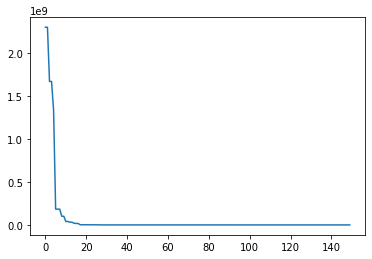

In [5]:
def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2
from sko.PSO import PSO
pso = PSO(func=demo_func, dim=3)
fitness = pso.run()
print('best_x is ',pso.gbest_x)
print('best_y is ',pso.gbest_y)
plt.plot(pso.gbest_y_hist)
plt.show()